<a href="https://colab.research.google.com/github/jcaicedoro/G1-Algoritmos/blob/main/Perceptron/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #O(1)
import matplotlib.pyplot as plt #O(1)
import pandas as pd  #O(1)
import random #O(1)
from google.colab import files #O(1)
pd.set_option('display.max_columns', 500)

#Selección de datos

Se hace primero la lectura y la selección de los datos.

In [ ]:
#cargar los archivos de los dataset
files.upload(); #O(n)

Saving data_banknote_authentication.csv to data_banknote_authentication.csv


In [ ]:
#Depende del dataset que escojamos si usamos (preferiblemente):
#Leer los datos del archivo
df = pd.read_csv('data_banknote_authentication.csv', sep=",", header=None) #O(n)
#tomar de las primeras 100 filas, las columnas Skewness of Wavelet Transformed image y Kurtosis of Wavelet Transformed image
bank_df = df[:][[1,2]]  #O(2n) ->  O(n)
#print(bank_df)
#tomar la columna especie como 1 para Iris-virginica y -1 para Iris-setosa
y_bank = df[:][[4]]  #O(2n) ->  O(n)
bank_df = np.array(bank_df, float) #O(n)
y_bank = np.where(y_bank == 1, 1, -1) #O(n)
#print(y_iris)
print("Primeros valores del dataset")
print(df.head(300))

Primeros valores del dataset
            0        1        2        3  4
0    3.621600  8.66610 -2.80730 -0.44699  0
1    4.545900  8.16740 -2.45860 -1.46210  0
2    3.866000 -2.63830  1.92420  0.10645  0
3    3.456600  9.52280 -4.01120 -3.59440  0
4    0.329240 -4.45520  4.57180 -0.98880  0
..        ...      ...      ...      ... ..
295  2.146400  6.07950 -0.57780 -2.23020  0
296  0.051979  7.05210 -2.05410 -3.15080  0
297  1.270600  8.03500 -0.19651 -2.18880  0
298  1.143000  0.83391  5.45520 -0.56984  0
299  2.292800  9.03860 -3.24170 -1.29910  0

[300 rows x 5 columns]


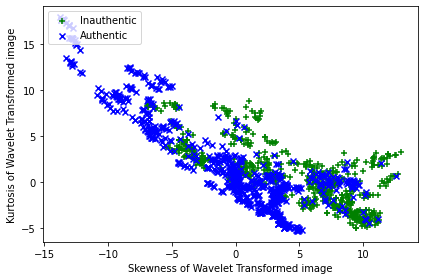

In [ ]:
#Selección de los datos
plt.scatter(bank_df[:686, 0], bank_df[:686, 1], color='green', marker='+', label='Inauthentic')
plt.scatter(bank_df[686:, 0], bank_df[686:, 1], color='blue', marker='x', label='Authentic')
plt.xlabel('Skewness of Wavelet Transformed image')
plt.ylabel('Kurtosis of Wavelet Transformed image')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Se puede notar que los datos no son linealmente separalables. Por lo que es necesario trabjar con los datos de manera diferente.


#Clase Perceptron

In [ ]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = float(eta)
        self.n_iter = n_iter

    def train(self, X, y):
        # inicializar los pesos en 0
        self.w = np.zeros(len(X[1])+1)
        #vector de errores acumulados
        self.errors = []

        #ciclo de entrenamiento
        for i in range(self.n_iter): #o(n)
            errors = 0 #O(1)
            for x_i, target in zip(X,y): #O(n)
                #calcular el nuevo valor de los pesos
                delta_w = np.array((target - self.predict(x_i)) * self.eta) #O(n)
                #actualizar el valor de los pesos
                self.w[1:] += delta_w * x_i #O(n)
                #actualizar el valor del bias
                self.w[0] += delta_w #O(n)
                if (delta_w!=0): #O(1)
                    errors += 1 #O(1)
            self.errors.append(errors) #O(n)
 

    def predict(self, X):
        #combinacion lineal, w[0] = bias
        v = np.dot( X, self.w [1:]) + self.w[0] #O(n)
        #funcion de activación 
        if v > 0.0: #O(1)
            return 1
        return -1

#Entrenamiento

In [ ]:
perceptron_authentication = Perceptron(0.1,200)

X_bank = bank_df[0:, [0, 1]]
perceptron_authentication.train(X_bank, y_bank)
error = 0

for i in range(0,len(X_bank+1)): #O(n)
    if perceptron_authentication.predict(X_bank[i]) != y_bank[i]: #O(1)
        error += 1 #O(1)
error = error / len(X_bank) * 100 #O(1)
print("error = {}%".format(error))

error = 55.539358600583085%


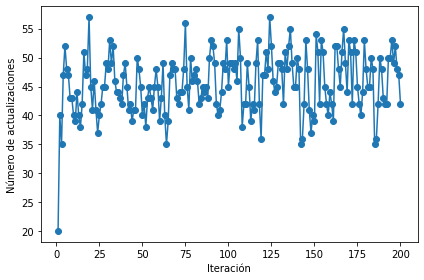

In [ ]:
plt.plot(range(1, len(perceptron_authentication.errors) + 1), perceptron_authentication.errors, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
plt.show()